In [1]:
%%capture
%pip install plotly pandas numpy matplotlib seaborn ipympl itables
%pip install 

# Common code and variables

In [2]:
%matplotlib widget

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
# mpl.use('pgf')
from matplotlib import pyplot as plt, ticker

import seaborn as sns
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

plt.style.use('seaborn')

width = 800

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family":  "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 17,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

<IPython.core.display.Javascript object>

/tmp/ipykernel_183199/332237666.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'acm':
        width_pt = 506.295
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 + 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in / golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [4]:
databases = { 'ClickhouseDB': '#orange',
             'ClickHouse': '#orange',
              'DatalayertsDB': '#75BDA7', 
              'TimescaleDB': '#c78181', 
              'PostgresDB':'orange',}
databases_modes = { 'ClickhouseDB_dedicated_regular': '#75BBA1',
             'ClickhouseDB_dedicated_irregular': '#c77581',
              'DatalayertsDB_dedicated_regular': '#75BDA7', 
              'DatalayertsDB_dedicated_irregular': '#75BBA1', 
              'TimescaleDB_dedicated_regular': '#c78181', 
             'TimescaleDB_dedicated_irregular': '#c78242', 
              'PostgresDB_dedicated_regular':'#8791ff',
              'PostgresDB_dedicated_irregular':'#8791rr',
              'DummyDB_dedicated_regular':'#8791ff',
              'DummyDB_dedicated_irregular':'#8791rr'}
databases_dims = {
    'ClickhouseDB_1': '#8791rr',
             'InfluxDB_1': '#8791rr',
              'DatalayertsDB_1': '#75BDA7', 
              'TimescaleDB_1': '#c78181', 
              'PostgresDB_1':'8791rr',
}
labels = { 'ClickhouseDB': 'ClickHouse',
              'InfluxDB': 'InfluxDB', 
          'PostgresDB':'PostgreSQL',    
          'TimescaleDB': 'TimescaleDB',
          'DatalayertsDB': 'DatalayerTS',
              }
labels_dims = { 'ClickhouseDB_1': 'ClickHouse 1Dim',
              'InfluxDB': 'InfluxDB', 
          'PostgresDB':'PostgreSQL',    
          'TimescaleDB': 'TimescaleDB',
          'DatalayertsDB': 'DatalayerTS',
              }
labels_modes = {'ClickhouseDB_dedicated_regular': 'ClickhouseDB_dedicated_regular',
             'ClickhouseDB_dedicated_irregular': 'ClickhouseDB_dedicated_irregular',
              'DatalayertsDB_dedicated_regular': 'DatalayertsDB_dedicated_regular', 
              'DatalayertsDB_dedicated_irregular': 'DatalayertsDB_dedicated_irregular', 
              'TimescaleDB_dedicated_regular': 'TimescaleDB_dedicated_regular', 
             'TimescaleDB_dedicated_irregular': 'TimescaleDB_dedicated_irregular', 
              'PostgresDB_dedicated_regular':'PostgresDB_dedicated_regular',
              'PostgresDB_dedicated_irregular':'PostgresDB_dedicated_irregular',
              'DummyDB_dedicated_regular':'DummyDB_dedicated_regular',
              'DummyDB_dedicated_irregular':'DummyDB_dedicated_irregular',
              }
modes = {
    'dedicated_irregular': '#f5700a',
             'dedicated_regular': '#8791ff',
              'mixed_irregular': '#75BDA7', 
              'mixed_regular': '#c78181', 
}
color_discrete_map_extra = { 'ClickhouseDB': 'grey', 
                            'InfluxDB': '#c78181', 
                            'TimescaleDB': 'grey', 
                            'InfluxDBExtended' : '#orange' }
colnames = ['Date','SucceededDataPoints','FailedDataPoints','Operation','Mode','TargetDatabase','Latency','ClientsNumber','BatchSize','Loop','SensorsNumber','Client','Iteration','Dimensions'] 
syscolnames = ['Timestamp','Database','Operation','ClientsNumber','BatchSize','Dimensions','SensorsNumber','Mode','CpuTotal','CpuSystem','CpuUser','CpuIOWait','CpuContextSwitches','CpuSysCalls','MemActive','MemAvailable','MemBuffers','MemCached','MemFree','MemInActive','MemTotal','MemShared','MemUsed','SwapFree','SwapSin','SwapSout','SwapTotal','SwapUsed','DiskReadBytes','DiskReadCount','DiskWriteBytes','DiskWriteCount','FsDeviceName','FsFree','FsFs_Type','FsKey','FsMnt_Point','FsPercent','FsSize','FsUsage','NetworkCumulativeConnections','NetworkCumulativeReceives','NetworkCumulativeTransmissions','NetworkConnections','NetworkTransmissions','NetworkReceives','NetworkIsUp','NetworkSpeed','ProcessCpuPercent','ProcessCpuTimes','ProcessIOCounters','ProcessMemoryInfo','ProcessMemoryPercent','ProcessThreadsNumber','ProcessStatus']
legend_kwargs = dict(borderpad=0.5, frameon=True, framealpha=1, facecolor='white', edgecolor='#F5F5F5', ncol=2, title=None)

In [5]:
## System Metrics Helpers
def to_megabytes(x):
    return x / 1e6

def to_mbps(x):
    return x * 8 / 1e6

def used_mem(x):
    l =  x * 100 / 32e9
    return l

def plot_database(ax, data, key, func, x=None, label=None):
    if func == 'log':
        ax.set_yscale('log')
    elif callable(func):
        data = func(data)
    if x is None:
        x = pd.Series(range(len(data)))
    return ax.plot(x, data, label=label, color=databases[key])

# Ingestion Scenarios
## common code

In [6]:

results = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/gitrepo/my-opi-git/SciTS/AllMetrics.csv', sep=";", on_bad_lines = 'warn',names = colnames )



results['Date'] =  pd.to_datetime(results['Date'], unit='ms' , errors = 'ignore' )
results['Latency'] = pd.to_numeric(results['Latency'], errors = 'coerce')
results['ClientsNumber'] = pd.to_numeric(results['ClientsNumber'], errors = 'coerce')
results['SucceededDataPoints'] = pd.to_numeric(results['SucceededDataPoints'] , errors = 'coerce' )
results  = results.sort_values(by=['TargetDatabase', 'Date' ]).loc[results['Latency'] > 0 ].loc[results['Dimensions'] > 0 ].loc[(results.TargetDatabase != "DummyDB")]   
results['Regularity']= results['Mode'].str.extract('\_(.*)', expand=False)
results_Ingestion = results.loc[ results.Operation.str.contains('Ingestion') ].assign(ValueArrays=lambda x: x.SucceededDataPoints * x.ClientsNumber )
results_Ingestion["DB_CN"] = results_Ingestion["TargetDatabase"]+results_Ingestion["ClientsNumber"].astype(str)  
results_Ingestion["DB_BS"] = results_Ingestion["TargetDatabase"]+results_Ingestion["BatchSize"].astype(str)  
results_Ingestion["DB_DIM"] = results_Ingestion["TargetDatabase"]+results_Ingestion["BatchSize"].astype(str) 

results_Query= results.loc[ results.Operation.str.contains('Query') ].assign(ValuePoints=lambda x: x.SucceededDataPoints)
results_Query["DB_OP"] = results_Query["TargetDatabase"]+results_Query["Operation"].astype(str) 

database_groups_ingestion = results_Ingestion.set_index('Date').groupby(['TargetDatabase', 'Mode','Operation','ClientsNumber', 'BatchSize', 'Dimensions','DB_CN','DB_BS','DB_DIM'] , as_index=False) # 
database_groups_query = results_Query.set_index('Date').groupby(['TargetDatabase', 'Mode','Operation','DB_OP'] , as_index=False) 





# TODO make _rates subsets to function 

ingestion_rates =  database_groups_ingestion.agg(
    {  "Latency":'mean' , "ValueArrays":'mean'  }# APPRxMBpS  :  MS to S -> DataArrays*Dimensions =Dtapaints. -> float to Byte -> byte to MB  IMPORTANT!! DLTS stores Double, so practically doubles the ingestion
    ).assign(ValuePoints=lambda x:  x.ValueArrays * x.Dimensions
   ).assign(PointsPerMS = lambda x: x.ValuePoints  / x.Latency 
   ).assign(ApprxMBpS=lambda x:  (x.PointsPerMS * 8 / 1000000  ) *1000
   )


  
   
query_rates =  database_groups_query.agg(
    {  "Latency":'mean' , "ValuePoints":'mean'  }# APPRxMBpS  :  MS to S -> DataArrays*Dimensions =Dtapaints. -> float to Byte -> byte to MB  IMPORTANT!! DLTS stores Double, so practically doubles the ingestion
    ).assign(PointsPerMS = lambda x: x.ValuePoints  / x.Latency 
   ).assign(ApprxMBpS=lambda x:  (x.PointsPerMS * 8 / 1000000  ) *1000
   )
   
   
   
mixedWL_rates=query_rates.groupby(['TargetDatabase','Mode','Operation'],as_index= False).agg({'Latency':'mean','ValuePoints':'mean','ApprxMBpS':'mean'}).merge(
    ingestion_rates.groupby(['TargetDatabase','Mode','Operation'],as_index= False).agg({'Latency':'mean','ValuePoints':'mean','ApprxMBpS':'mean'}) , how='outer'  , on=['TargetDatabase','Mode','Operation','Latency','ValuePoints','ApprxMBpS'] 
    )
mixedWL_rates=mixedWL_rates[mixedWL_rates['Mode'].str.contains('mixed')]
mixedWL_rates['Percentage'] = mixedWL_rates['Mode'].str.extract('(\d+)', expand=False)

   

top_rates= ingestion_rates.groupby(['TargetDatabase', 'Mode','BatchSize','ClientsNumber','Dimensions'], as_index=False)['ApprxMBpS'].max().groupby(['TargetDatabase', 'Mode'], as_index=False , group_keys=True)['ApprxMBpS'].max().merge( ingestion_rates)

# [['TargetDatabase', 'Mode','ApprxMBpS','ClientsNumber','BatchSize']]

   
# ingestion_rates["DB_CN"] = ingestion_rates["TargetDatabase"]+ ingestion_rates["ClientsNumber"]
#    .assign(DB_CN = lambda x:   
#        x.TargetDatabase +"_"+ x.ClientsNumber )
   #.assign(DB_Mode = lambda x:  x.TargetDatabase +"_"+ x.Mode 
   #).assign(DB_Dim = lambda x:  x.TargetDatabase +"_" + str(x.Dimensions) )
   

/tmp/ipykernel_183199/2889134910.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  results['Date'] =  pd.to_datetime(results['Date'], unit='ms' , errors = 'ignore' )




## ingestion rate,
### regular vs irregular: 

first violin plot for each ClientsNumber per Database, then Bachsize per Database. After each graph a table with the mean values


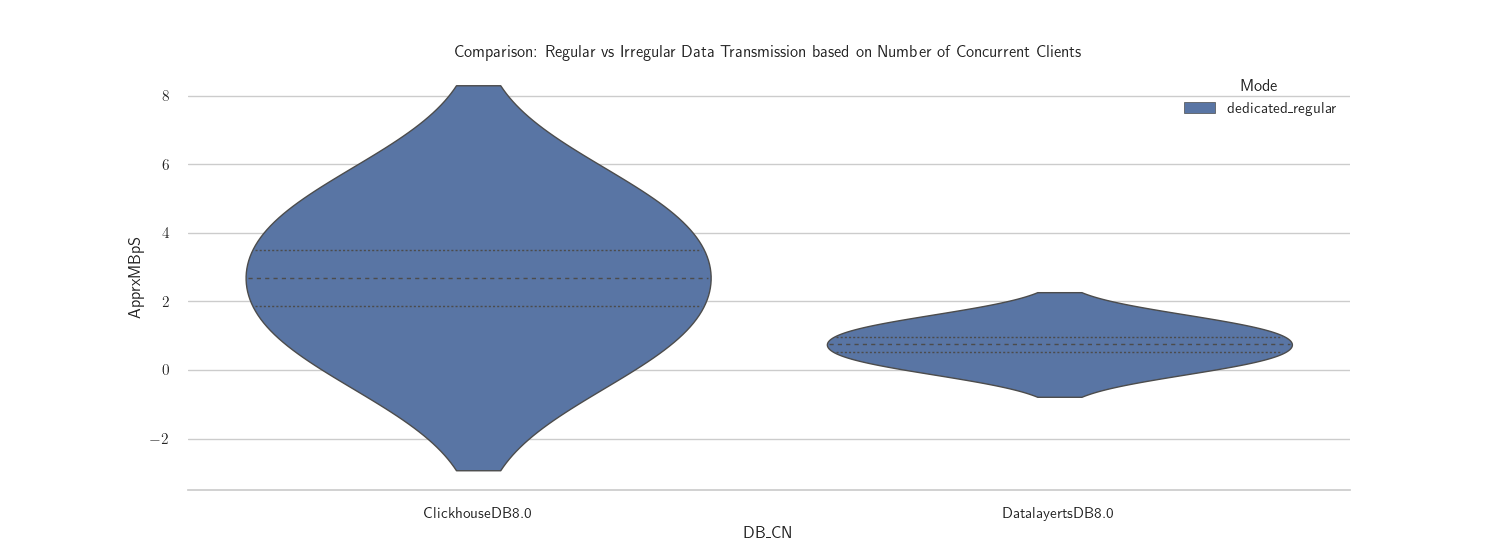

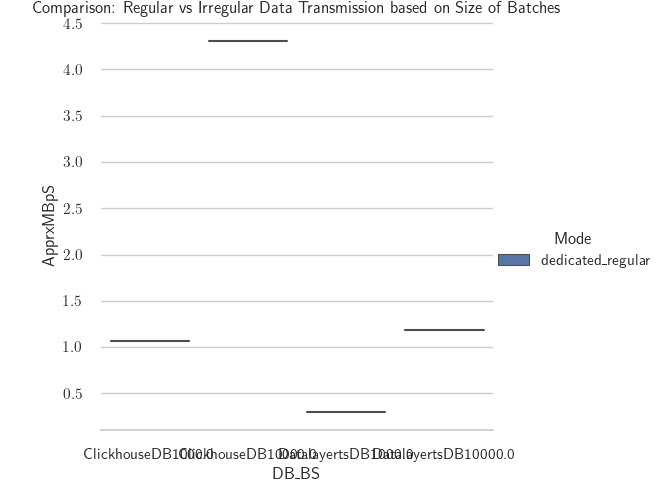

Stdev for CLientsNumber and Batchsize


TOP RATES and their resp. CLientsNumbers and Batchsizes


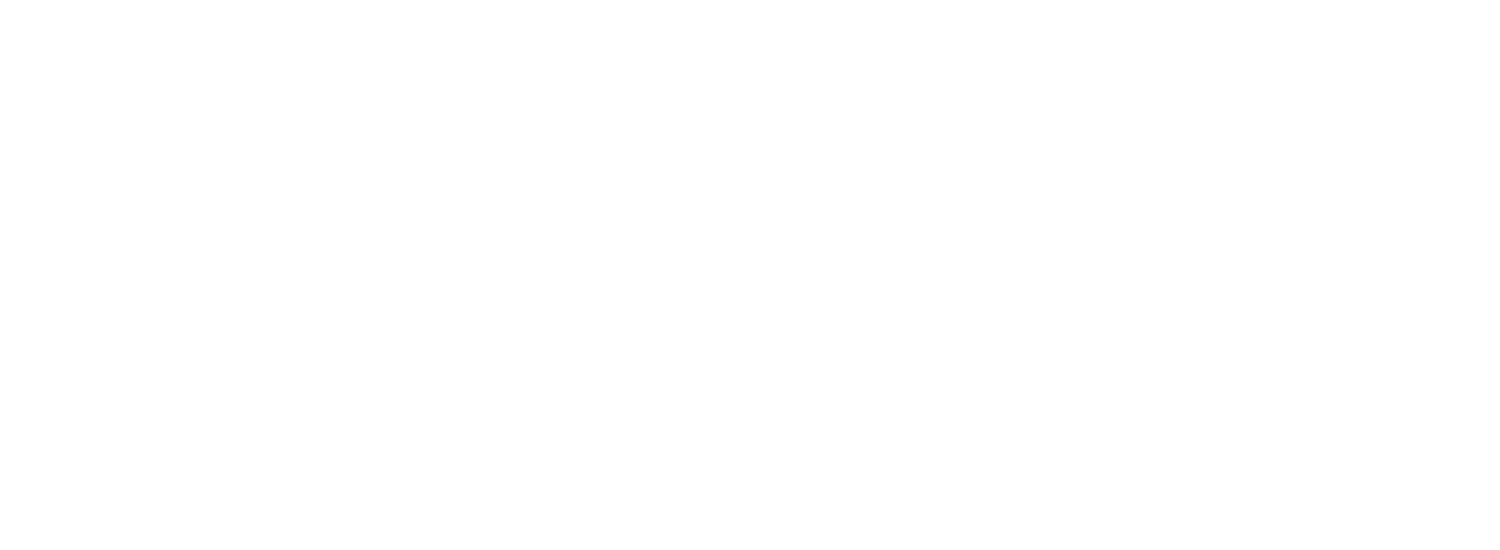

In [7]:
regularity_ingestion_rates=ingestion_rates.loc[ingestion_rates.Mode.str.contains('dedicated_') ] 
   


print("first violin plot for each ClientsNumber per Database, then Bachsize per Database. After each graph a table with the mean values")
# violin plot

import seaborn as sns
sns.set_theme(style="whitegrid")


#ClientsNumber
# fig, ax = plt.subplots()
plt.figure("CN" ).set_figwidth(15)
sns.violinplot(data=regularity_ingestion_rates, x="DB_CN", y="ApprxMBpS", hue="Mode",
               split=False, inner="quart", linewidth=1, 
               palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Transmission based on Number of Concurrent Clients")
plt.show()
plt.savefig('./regularityCN-violin.pdf', format='pdf')
# plt.close()


agg_regularityCN= regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','ClientsNumber'], as_index=False).agg({  "ApprxMBpS":'mean'  })

show(pd.DataFrame(data=agg_regularityCN)) 




# #Batchsize
# fig2, ax2 = plt.subplots()
plt.figure("BS").set_figwidth(15)
sns.catplot(data=regularity_ingestion_rates,kind='violin', x="DB_BS", y="ApprxMBpS", hue="Mode",)
            #    split=True, inner="quart", linewidth=1, ax=ax2[1],
            #    palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Transmission based on Size of Batches")
plt.show()
plt.savefig('./regularityBS-violin.pdf', format='pdf')
# plt.close()


agg_regularityBS= regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','BatchSize'], as_index=False).agg({  "ApprxMBpS":'mean'  })
show(pd.DataFrame(data=agg_regularityBS)) 




print("Stdev for CLientsNumber and Batchsize")
stdev_regularity=  regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','BatchSize']).agg({  "ApprxMBpS":'var'  }).rename(columns={'ApprxMBpS':'BS-VAR'}).join(regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','ClientsNumber']).agg({  "ApprxMBpS":'var'  }).rename(columns={'ApprxMBpS':'CN-VAR'}))
show(pd.DataFrame(data=stdev_regularity)) 




# # TOP Values

print("TOP RATES and their resp. CLientsNumbers and Batchsizes")
show(pd.DataFrame(data=top_rates[top_rates['Mode'].str.contains('dedicated_') ])) 




### ingestion and query rates, mixed DP WL vs mixed-AllQueries

ValueError: min() arg is an empty sequence

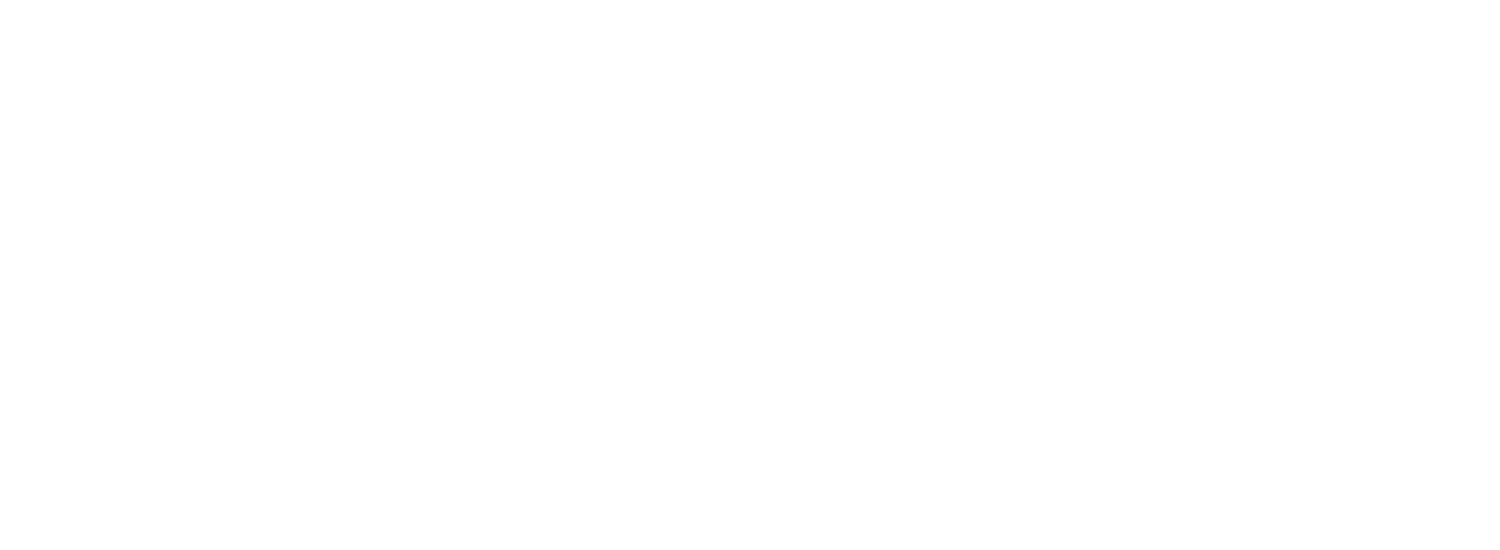

In [8]:
mixedQueries_results = results[results['Mode'].str.contains('mixedQ')].assign(Mode_OP = lambda x: x.Mode + x.Operation).assign(OP_R = lambda x: x.Operation + " " + x.Regularity)
mixedQueries_results['Percentage'] = mixedQueries_results['Mode'].str.extract('(\d+)', expand=False)


# [['TargetDatabase','Mode','Operation','Latency','ApprxMBpS','ValuePoints']
#        ].loc[results['Mode']==['mixedQueries_regular','mixedQueries_irregular'] ]


    
# General overview and mean values across BS CN DIM ...

import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.figure("MQ-R").set_figwidth(15)



# fig.suptitle('Horizontally stacked subplots')

# fig, (ax1, ax2 ) = plt.subplots(1, 2)


# # Draw a nested violinplot and split the violins for easier comparison
# ax1 = sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('25')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", linewidth=1,
#                palette={"regular": "b", "irregular": ".85"})

# ax2 = sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('50')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", linewidth=1,
#                palette={"regular": "r", "irregular": ".85"})


# sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('75')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", linewidth=1,
#                palette={"regular": "g", "irregular": ".85"})


import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
 

# Draw a pointplot to show pulse as a function of three categorical factors
# sns.catplot(
#     data=mixedQueries_results[mixedQueries_results['Mode'].str.contains('Ingestion')],x="Percentage", y="Latency", hue="TargetDatabase", col="Regularity", 
#     capsize=.2, palette="YlGnBu_d", errorbar="se",
#     kind="point", height=6, aspect=.75,
# )
sns.catplot( # bar or point? 
    data=mixedQueries_results,x="Percentage", y="Latency", hue="TargetDatabase", col="OP_R",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="bar", height=6, aspect=.75,
)

sns.despine(left=True)


# sns.despine(left=True)
plt.show()







# ## grouped boxplot

# import seaborn as sns
# sns.set_theme(style="ticks", palette="pastel")


# plt.figure("MQ-R").set_figwidth(15)
# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="Percentage", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data=mixedQueries_results_reg)
# sns.despine(offset=10, trim=True)
# plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-groupedBP-R.pdf', format='pdf')
# plt.show()




# plt.figure("MQ-IR").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=[ "g","b","r"],
#             data=mixedQueries_results_irreg)
# sns.despine(offset=10, trim=True)
# plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Irregular Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-groupedBP-IR.pdf', format='pdf')
# plt.show()



# # select TOP RATE CONFIG from base ingestion and analyse mixed WL

# mixedQueries_TOP_results = results[results['Mode'].str.contains('mixedQueries')].assign(Mode_OP = lambda x: x.Mode + x.Operation).merge(top_reg_rates, how='right', on=['TargetDatabase','BatchSize','ClientsNumber'] )






# plt.figure("MQ-TOP_I").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data= mixedQueries_TOP_results[mixedQueries_TOP_results['Operation'].str.contains('Ingestion')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Latency For Ingestion Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-TOP-I-groupedBP.pdf', format='pdf')
# plt.show()





# plt.figure("MQ-TOP_Q").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data= mixedQueries_TOP_results[mixedQueries_TOP_results['Operation'].str.contains('Query')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Latency For Query Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-TOP-Q-groupedBP.pdf', format='pdf')
# plt.show()



In [ ]:

mixedPoints_results_reg= results[results['Mode'].str.contains('mixedPoints_reg')].assign(Mode_OP = lambda x: x.Mode + x.Operation)
mixedPoints_results_reg['Percentage'] = mixedPoints_results_reg['Mode'].str.extract('(\d+)', expand=False)


mixedPoints_results_irreg = results[results['Mode'].str.contains('mixedPoints_irreg')].assign(Mode_OP = lambda x: x.Mode + x.Operation)
mixedPoints_results_irreg['Percentage'] = mixedPoints_results_irreg['Mode'].str.extract('(\d+)', expand=False)


# [['TargetDatabase','Mode','Operation','Latency','ApprxMBpS','ValuePoints']
#        ].loc[results['Mode']==['mixedPoints_regular','mixedPoints_irregular'] ]



# General overview and mean values across BS CN DIM ...



## grouped boxplot

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


plt.figure("MP-R").set_figwidth(15)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Percentage", y="Latency",
            hue="DB_Mode", palette=["m", "g","b","r","y","w"],
            data=mixedPoints_results_reg)
sns.despine(offset=10, trim=True)
plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-groupedBP-R.pdf', format='pdf')
plt.show()




plt.figure("MP-IR").set_figwidth(15)

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data=mixedPoints_results_irreg)
sns.despine(offset=10, trim=True)
plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-groupedBP-IR.pdf', format='pdf')
plt.show()




mixedPoints_TOP_results = results[results['Mode'].str.contains('mixedPoints')].assign(Mode_OP = lambda x: x.Mode + x.Operation).merge(top_rates, how='right', on=['TargetDatabase','BatchSize','ClientsNumber'] )



plt.figure("MP-TOP_I").set_figwidth(15)

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data= mixedPoints_TOP_results[mixedPoints_TOP_results['Operation'].str.contains('Ingestion')] )
sns.despine(offset=10, trim=True)
plt.title("TOP (Optimal Ingestion Config.) Latency For Ingestion Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-TOP-I-groupedBP.pdf', format='pdf')
plt.show()


plt.figure("MP-TOP_Q").set_figwidth(15)

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data= mixedPoints_TOP_results[mixedPoints_TOP_results['Operation'].str.contains('Query')] )
sns.despine(offset=10, trim=True)
plt.title("TOP (Optimal Ingestion Config.) Latency For Query Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-TOP-Q-groupedBP.pdf', format='pdf')
plt.show()



ValueError: Could not interpret input 'DB_Mode'

### Multi Dim


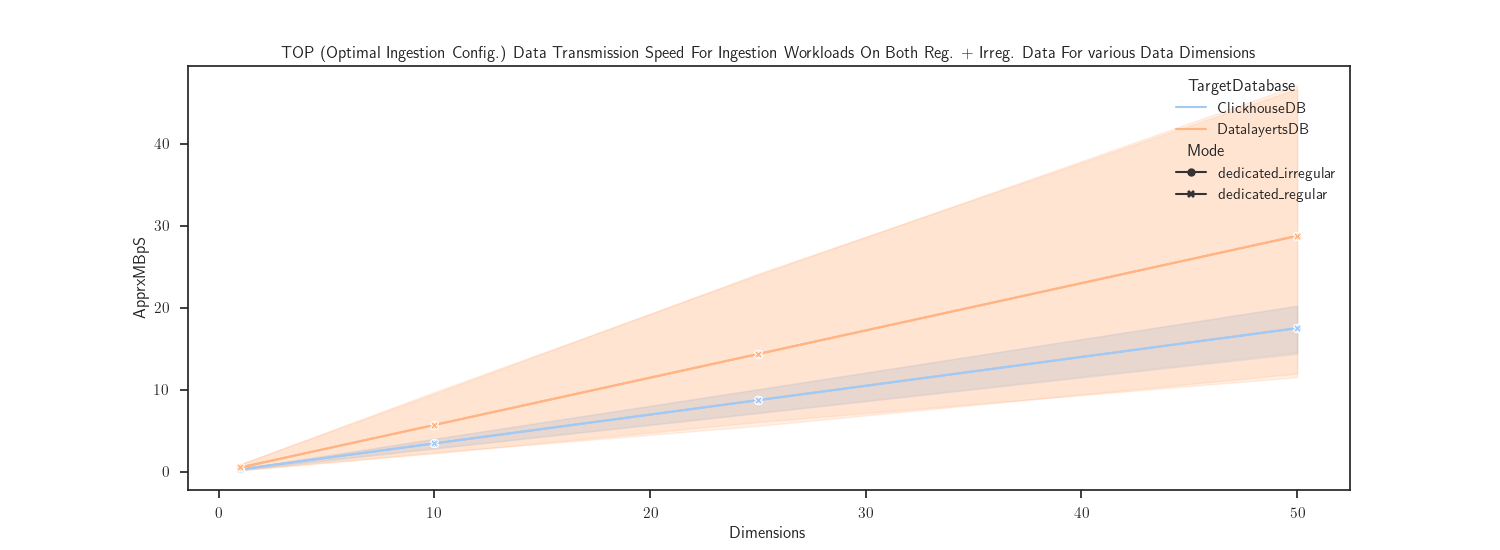

In [ ]:

multidimIng_results= ingestion_rates[ingestion_rates['Mode'].str.contains('dedicated')] 

multidimIng_TOP_all = results[results['Mode'].str.contains('dedicated')].merge(top_rates, how='right', on=['TargetDatabase','BatchSize','ClientsNumber']  )
# TODO lineplot with variance  , 99% quantil . 1 % quantil or min and max ,, like a mix between barplot and lineplots


# plt.figure("multidim-TOP-I").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Dimensions", palette=["m", "g","b","r","y","w"],
#             data= multidimIng_TOP[multidimIng_TOP['Operation'].str.contains('Ingestion')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Data Transmission Speed For Ingestion Workloads On Both Reg. + Irreg. Data For various Data Dimensions")

# plt.savefig('./multidim-TOP-I-groupedBP.pdf', format='pdf')
# plt.show()


plt.figure("multidim-TOP-I").set_figwidth(15)
plt.title("TOP (Optimal Ingestion Config.) Data Transmission Speed For Ingestion Workloads On Both Reg. + Irreg. Data For various Data Dimensions")

sns.lineplot(data=multidimIng_results, x="Dimensions", y="ApprxMBpS", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig('./multidim-TOP-I-linep.pdf', format='pdf')
plt.show()


# #show(ingestion_rates)
# fig, ax = plt.subplots(figsize=set_size('acm',))
# for key, grp in regularity_ingestion_rates.groupby(['DB_Dim']):
#     ax.plot(grp['ValuePoints'][:-1], grp['ApprxMBpS'][:-1], label=labels_dims[key], color=databases_dims[key]) 

# ymin, ymax = ax.get_ylim()
# # ax.set_ylim(ymin, ymax * 1.35)
# ax.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0., prop={'size': 9}) 

# ax.set_xlabel('Ingested Value(Array)s ( Clients * Batch )')
# ax.set_ylabel('Ingestion Rate (points/second)')
# # plt.tight_layout()
# plt.show()
# plt.savefig('./mixedP.pdf', format='pdf')

# summary = []
# for key, grp in database_groups_ingestion:
#     grp_summary = {}
#     grp_summary['TargetDatabase'] = key
#     grp_summary['TotalTime'] = grp.index.max() - grp.index.min()
#     grp_summary['TotalIngestionRate'] = grp['ValuePoints'].sum() / grp_summary['TotalTime'].total_seconds()
#     grp_summary['MBps'] = grp_summary['TotalIngestionRate'] * 8 / 1e6
#     summary.append(grp_summary)

# show(pd.DataFrame(data=summary))

## System Metrics
### regurlar vs irregular transaction system usage 


In [ ]:
from datetime import datetime as dt
import math



   
   

systemmetrics = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/gitrepo/my-opi-git/SciTS/Glances23-8.csv', sep=";",  names = syscolnames, on_bad_lines = 'warn' )
systemmetrics['Timestamp'] =  pd.to_datetime(systemmetrics['Timestamp'], unit='ms' , errors = 'ignore' )

# join
# Glances.csv: Timestamp;Database;Operation;ClientsNumber;BatchSize;SensorsNumber;CpuTotal;CpuSystem;CpuUser;CpuIOWait;CpuContextSwitches;CpuSysCalls;MemActive;MemAvailable;MemBuffers;MemCached;MemFree;MemInActive;MemTotal;MemShared;MemUsed;SwapFree;SwapSin;SwapSout;SwapTotal;SwapUsed;DiskReadBytes;DiskReadCount;DiskWriteBytes;DiskWriteCount;NetworkCumulativeConnections;NetworkCumulativeReceives;NetworkCumulativeTransmissions;NetworkConnections;NetworkTransmissions;NetworkReceives;NetworkIsUp;NetworkSpeed;ProcessCpuPercent;ProcessCpuTimes;ProcessIOCounters;ProcessMemoryInfo;ProcessMemoryPercent;ProcessThreadsNumber;ProcessStatus
# and in future: DiskUsage, Dimension, Mode
# systemmetrics_with_results = my_results INNER (aber auch full waere interessant, um zu sehen ob Metrics CSV lueckenhaft) JOIN systemmetrics  ON (Timestamp &[timestamp evtl nicht mgl da wenige MS unterschiede, aber auch nicht noetig]) Database & Operation & BatchSize & SensorsNumber & Dimensions & Mode

n_sysdf = systemmetrics
sysdf = systemmetrics

t0 = dt.now()
n_sysdf['Database'] = n_sysdf['Database'].apply(lambda x: labels[x])
n_sysdf['Timestamp'] = pd.to_datetime(n_sysdf['Timestamp'], unit='ns')
# sysdf.set_index('Timestamp', inplace=True)
# sysdf = sysdf.sort_values(by=['Database', 'Timestamp'])
t1 = dt.now()
print('Loaded', len(n_sysdf), 'Items in', t1-t0)

system = {'CpuTotal': None, 'CpuIOWait': None, 
          'CpuSystem': None, 'CpuUser': None,
          'SwapSin': to_megabytes, 'SwapSout': to_megabytes, 'DiskWriteBytes': 'log',
          'DiskReadBytes': 'log', 'DiskWriteCount': 'log', 'DiskReadCount': 'log', 
          'MemAvailable': used_mem, 'MemCached': to_megabytes,
          'SwapUsed': to_megabytes, 'NetworkTransmissions': to_mbps, 'NetworkReceives': to_mbps,
         }



sysgrouped = sysdf.groupby(['Database', 'ClientsNumber'], as_index=False).mean()
# a = {}
# idx = 0
# iterator = iter(system.items())
# for metric, func in iterator:
#     for key, group in sysgrouped.groupby('Database', as_index=False):
#         data = group[metric]
#         line = plot_database(ax[idx, 0], data, key, func, x=group['ClientsNumber'])
#         a[key] = line[0]
#     # sns.lineplot(ax=ax[idx, 0], data=sysgrouped, x='ClientsNumber', y=metric, hue='Database')
#     ax[idx, 0].set_title(metric)
#     ax[idx, 0].set_xticks([1,2,4,8,12,18,24,36,48])
#     try:
#         metric, func = next(iterator)
#         for key, group in sysgrouped.groupby('Database', as_index=False):
#             data = group[metric]
#             line = plot_database(ax[idx, 1], data, key, func, x=group['ClientsNumber'])
        
#         ax[idx, 1].set_title(metric)
#         ax[idx, 1].set_xticks([1,2,4,8,12,18,24,36,48])
#     except StopIteration as e:
#         pass
#     idx += 1


# fig.legend(list(a.values()), list(a.keys()), loc='upper center', **legend_kwargs)
# fig.tight_layout()
# fig.subplots_adjust(top=0.95)

# plt.show()
means = n_sysdf.groupby(['Database', 'ClientsNumber']).mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )
sns.lineplot(x='ClientsNumber', y='CpuTotal', hue='Database', palette=databases, data=means, ax=ax, marker='o', legend=False)
sns.lineplot(x='ClientsNumber', y='CpuUser', hue='Database', palette=databases, data=means, ax=ax,  marker='>', linestyle="dashed", legend=False)
ax.set_xticks([1, 2, 4, 8, 12, 18, 24, 36, 48])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xlabel('Clients Number')
ax.set_ylabel('CPU Usage (\%)')
print(ax.get_lines())
h, l = ax.get_legend_handles_labels()
handles = []
lbls = []
# for x in range(len(h)):
#     if l[x] in labels.values():
#         handles.append(h[x])
#         lbls.append(l[x])
# [x for x in ax.get_lines() if x.get_label() in labels.values()], ['ClickHouse (Total)', 'InfluxDB (Total)', 'PostgreSQL (Total)',  'TimescaleDB (Total)', 'ClickHouse (User)', 'InfluxDB(User)', 'PostgreSQL(User)',  'TimescaleDB(User)',], 
ax.legend(labels=['ClickHouse (Total)', 'InfluxDB (Total)', 'PostgreSQL (Total)',  'TimescaleDB (Total)', 'ClickHouse (User)', 'InfluxDB (User)', 'PostgreSQL (User)',  'TimescaleDB (User)',],
         bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0., prop={'size': 8})
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/clients-cpu.pdf', format='pdf')

Loaded 78 Items in 0:00:00.003242


TypeError: Could not convert RangeQueryRawAllDimsDataRangeQueryRawAllDimsDataRangeQueryRawAllDimsDataRangeQueryRawAllDimsDataRangeQueryRawAllDimsDataRangeQueryRawAllDimsDataRangeQueryRawAllDimsDataRangeQueryRawAllDimsData to numeric

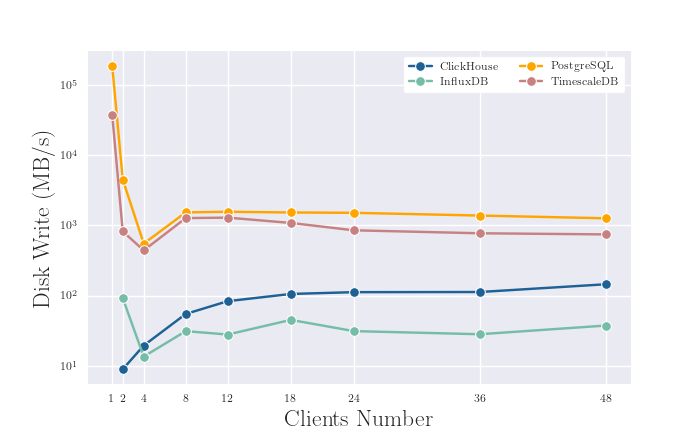

In [ ]:
means = n_sysdf.groupby(['Database', 'ClientsNumber']).mean().reset_index() 
means['DiskWriteBytes'] = means['DiskWriteBytes'] / 1e6
fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )

sns.lineplot(x='ClientsNumber', y='DiskWriteBytes', hue='Database', palette=databases, data=means, marker='o', legend=False,
             ax=ax, markers='o', 
            )
ax.set_yscale('log')
ax.set_xticks([1, 2, 4, 8, 12, 18, 24, 36, 48])
# ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xlabel('Clients Number')
ax.set_ylabel('Disk Write (MB/s)')
ax.legend(labels=['ClickHouse', 'InfluxDB', 'PostgreSQL',  'TimescaleDB'], **legend_kwargs, )
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/clients-diskwrite.pdf', format='pdf')

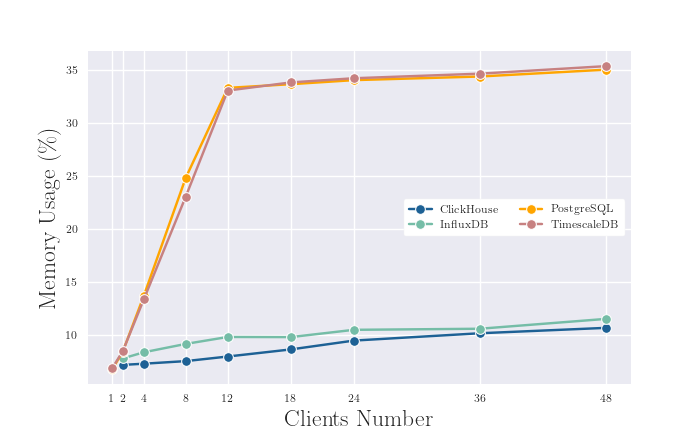

In [ ]:
means = n_sysdf.groupby(['Database', 'ClientsNumber']).mean().reset_index()
means['MemUsed'] = used_mem(means['MemUsed'])
fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )

sns.lineplot(x='ClientsNumber', y='MemUsed', hue='Database', palette=databases, data=means, marker='o',
             ax=ax, markers='o'
            )
ax.set_xticks([1,2,4,8,12,18,24,36,48])
# ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xlabel('Clients Number')
ax.set_ylabel('Memory Usage (\%)')
ax.legend(labels=['ClickHouse', 'InfluxDB', 'PostgreSQL',  'TimescaleDB'], **legend_kwargs, loc='center right')
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/clients-mem.pdf', format='pdf')

### mixed query and points transaction system useage

In [ ]:
%%

UsageError: Cell magic `%%` not found.


### multiDim transaction system usage

In [ ]:
%%

## Scaling: How does the System behave with long-term ingestion?
### ingestion rate

In [ ]:
scaling_ingestion_rates=ingestion_rates.assign(AlreadyIngested=ingestion_rates.groupby(['TargetDatabase'])["Values"].cumsum()  )  


    
#show(ingestion_rates)
fig, ax = plt.subplots(figsize=set_size('acm',))
for key, grp in scaling_ingestion_rates.groupby(['TargetDatabase']):
    ax.plot(grp['AlreadyIngested'][:-1], grp['ApprxMBpS'][:-1] ) # , label=labels[key], color=databases_modes[key]

ymin, ymax = ax.get_ylim()
# ax.set_ylim(ymin, ymax * 1.35)
ax.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0., prop={'size': 9}) 

ax.set_xlabel('Size of Database (records)')
ax.set_ylabel('Ingestion Rate (points/second)')
# plt.tight_layout()
plt.show()
plt.savefig('./scaling.pdf', format='pdf')

summary = []
for key, grp in database_groups_ingestion:
    grp_summary = {}
    grp_summary['TargetDatabase'] = key
    grp_summary['TotalTime'] = grp.index.max() - grp.index.min()
    grp_summary['TotalIngestionRate'] = grp['SucceededDataPoints'].sum() / grp_summary['TotalTime'].total_seconds()
    grp_summary['MBps'] = grp_summary['TotalIngestionRate'] * 24 / 1e6
    summary.append(grp_summary)

show(pd.DataFrame(data=summary))
    

KeyError: 'Column not found: Values'

### storage


In [ ]:
#diskusage since ingestionstart

### CPU  

In [ ]:
from datetime import datetime as dt
import math
t0 = dt.now()
sysdf= pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/gitrepo/my-opi-git/SciTS/Glances23-8.csv',)
sysdf['Timestamp'] = pd.to_datetime(sysdf['Timestamp'], unit='ms')
# sysdf.set_index('Timestamp', inplace=True)
sysdf = sysdf.sort_values(by=['Database', 'Timestamp'])
t1 = dt.now()
print('Loaded', len(sysdf), 'Items in', t1-t0)
print(sysdf.columns)
sysgrouped = sysdf.groupby(['Database'])#.filter(lambda x: (x['Database'].iloc[0] == 'PostgresDB') or (x['Database'].iloc[0] == 'TimescaleDB')).groupby(['Database'])

system = {'CpuIOWait': None, 
          'DiskReadBytes': 'log',
         }

# iterator = iter(system.keys())
# plots_len = math.ceil(len(system) / 2)
# fig, ax = plt.subplots(plots_len, 2, figsize=set_size(800), )
# idx= 0
# a = {}
# for metric in iterator:
#     axis = ax[idx] if plots_len == 1 else ax[idx, 0]
#     for key, grp in sysgrouped:
#         data = grp[metric]
#         line = plot_database(axis, data, key, system[metric])
#         a[key] = line[0]
#     axis.set_title(metric)
    
#     try:
#         axis = ax[idx] if plots_len == 1 else ax[idx, 1]
#         metric = next(iterator)
#         for key, grp in sysgrouped:
#             data = grp[metric]
#             plot_database(axis, data, key, system[metric])
#         axis.set_title(metric)
#     except StopIteration as e:
#         pass
#     idx += 1

# fig.legend(list(a.values()), list(a.keys()), loc='upper center', **legend_kwargs)
# fig.tight_layout()
# fig.subplots_adjust(top=0.95)

fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )


for key, grp in sysgrouped:
    print(key, grp['CpuIOWait'].max(), grp['CpuIOWait'].mean())
    data = grp['CpuIOWait'].groupby(grp['CpuIOWait'].index // 10).mean()
    plot_database(ax, data, key, None,label=labels[key])

ax.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0., prop={'size': 9}) 
# ax.legend(**legend_kwargs)
ax.set_xlabel('Time (second)')
ax.set_ylabel('CPU IO Wait (\%)')
ax.set_xticks(ax.get_xticks()[1:], ax.get_xticks().astype(int)[1:] * 10)
# plt.tight_layout()
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/scaling-cpuiowait.pdf', format='pdf')

ParserError: Error tokenizing data. C error: Expected 10 fields in line 3, saw 11


### memory

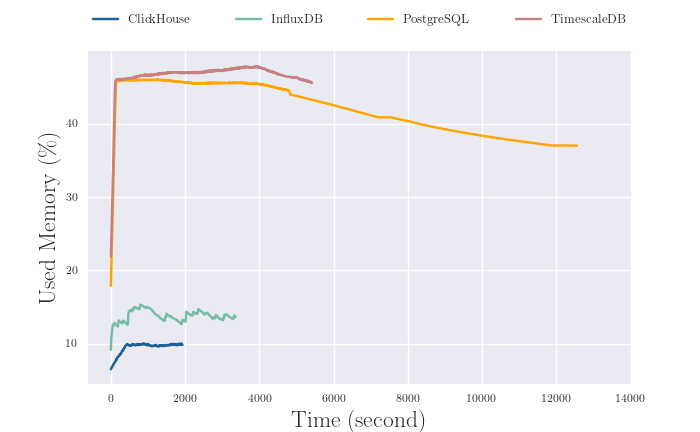

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )

metric = 'MemUsed'
print(sysgrouped)
for key, grp in sysgrouped:
    data = grp[metric].groupby(grp[metric].index // 10).mean()
    plot_database(ax, data, key, used_mem, label=labels[key])
ax.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0., prop={'size': 9})
# ax.legend(**legend_kwargs)
ax.set_xlabel('Time (second)')
ax.set_ylabel('Used Memory (\%)')
ax.set_xticks(ax.get_xticks()[1:], ax.get_xticks().astype(int)[1:] * 10)
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/scaling-usedmem.pdf', format='pdf')


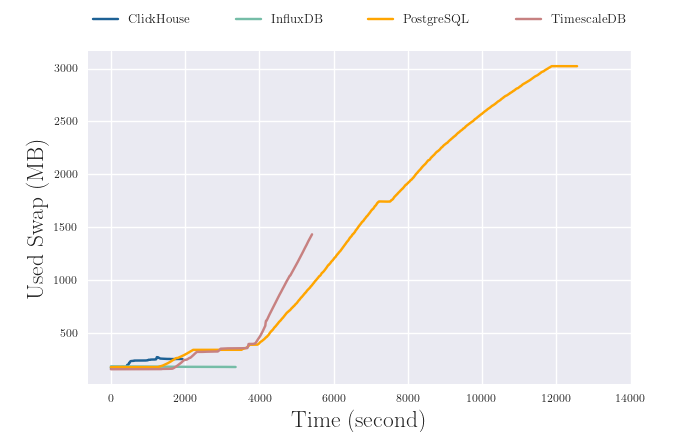

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )

metric = 'SwapUsed'
for key, grp in sysgrouped:
    data = grp[metric].groupby(grp[metric].index // 10).mean()
    plot_database(ax, data, key, to_megabytes, label=labels[key])
ax.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0., prop={'size': 9})
# ax.legend(**legend_kwargs)
ax.set_xlabel('Time (second)')
ax.set_ylabel('Used Swap (MB)')
ax.set_xticks(ax.get_xticks()[1:], ax.get_xticks().astype(int)[1:] * 10)
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/scaling-swap.pdf', format='pdf')

# Queries (TODO include GLances Join and Query System Metrics for all tables)
## regular vs irregular query stats  

In [ ]:
queries_results = pd.read_csv('~/metrics-22-06/MReadAll.csv', sep=";",  on_bad_lines = 'warn')
queries_results['Latency'] = pd.to_numeric(queries_results['Latency'], errors = 'coerce')
queries_results  = queries_results.loc[queries_results['Latency'] > 0 ]
def _query_stat(group):
    lat = group['Latency']
    return pd.Series({'min': lat.min(), 'avg': lat.mean(), '95': lat.quantile(0.95), 'max': lat.max(),  'stddev': lat.std()})

def show_query_stat(qtype):
    dbs = queries_results[queries_results['Operation'] == qtype].groupby(['Mode',"TargetDatabase"]).apply(_query_stat)
    show(dbs)
    


Skipping line 32670: expected 15 fields, saw 16
Skipping line 32756: expected 15 fields, saw 17
Skipping line 32760: expected 15 fields, saw 17

/tmp/ipykernel_365079/3588547693.py:1: DtypeWarning: Columns (1,2,6,7,8,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  queries_results = pd.read_csv('~/metrics-22-06/MReadAll.csv', sep=";",  on_bad_lines = 'warn')


In [ ]:
show_query_stat('RangeQueryRawData')
show_query_stat('RangeQueryRawAllDimsData')

In [ ]:
show_query_stat('OutOfRangeQuery')

In [ ]:
show_query_stat('STDDevQuery')

In [ ]:
show_query_stat('RangeQueryAggData')

In [ ]:
show_query_stat('DifferenceAggQuery')

## mixed  Query / DP WL stats

## Multidim Query stats

# OPTIONAL or OBSOLETE




## Batching Experiments (optional)
Compare the ingesiton performance of the TSDBs and to understand the relationship between the performance and batch size

### Using a single client

#### Batch Latency

In [ ]:
batching_1c = pd.read_csv("~/metrics-22-06/MWriteAll7.csv", sep=";" ,names = colnames)
# batching_1c['Date'] = pd.to_datetime(batching_1c['Date'], unit='ns')
batching_1c['Latency'] = pd.to_numeric(batching_1c['Latency'], errors = 'coerce')
# batching_1c  = batching_1c.loc[batching_1c['Latency'] > 0 ].loc[batching_1c["TargetDatabase"=="ClickhouseDB"]] 

fig, ax = plt.subplots(figsize=set_size('acm'),)
sns.boxplot(x="BatchSize", y="Latency", hue="Mode",
            showmeans=True, data=batching_1c, ax=ax, palette=modes, width=0.4, linewidth=0.5,
         fliersize=1 )


ax.set_yscale('log')

ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%d"))
ax.legend(**legend_kwargs)
ax.set_xlabel('Batch Size')
ax.set_ylabel('Ingestion Latency (in milliseconds)')
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='y', which='minor', labelsize=5)
ax.grid(True, which="both", axis='y')
# fig.tight_layout()
plt.show()
plt.savefig('~/batching.pdf', format='pdf')

NameError: name 'set_size' is not defined

### Batch Size = 10'000 and Numerous Clients

In [ ]:
batching_n = pd.read_csv("~/Metrics1-8.csv",sep=";" ,names = colnames)
batching_n['Latency'] = pd.to_numeric(batching_n['Latency'], errors = 'coerce')
batching_n  = batching_n.loc[batching_n['Latency'] > 0 ] 
# batching_n['Date'] = pd.to_datetime(batching_n['Date'], unit='ns')
fig, ax = plt.subplots(figsize=set_size('acm'),)

# sns.boxplot(x="SucceededDataPoints", y="Latency", hue="TargetDatabase",
#             showmeans=True, data=batching_1c, ax=ax, palette=databases,width=0.4,
#             color=color, fliersize=1,)
# def batch_ingestionrate(x):
#     duration = x['Date'].max() - x['Date'].min()
#     sum = x['SucceededDataPoints'].sum()
#     return pd.Series({'IngestionRate': sum / duration.total_seconds()})
# def batch_diff(x):
#     reg = x['Mode'].values["distinct_default"] 
#     ir = x['Mode'].values["distinct"]  
#     return pd.Series({'DifferenceIR-R': abs(reg-ir) })

batchn = batching_n.groupby(['Mode',"ClientsNumber", "BatchSize"]).median("Latency").reset_index()

sns.lineplot(x='ClientsNumber', y='Latency', hue='Modes', palette=modes, data=batchn, ax=ax, marker='o')
ax.legend(**legend_kwargs )

ax.set_xticks([1,2,4,8,16])
ax.set_xlabel('Clients Number')
ax.set_ylabel('Ingestion Latency MEDIAN')

# fig.tight_layout()
plt.show()
plt.savefig('~/clients.pdf', format='pdf')

KeyError: 'Latency'